## Obtaining values from a transect from a 1D and 1/4D output
This is an example script on how to obtain values of non-diaton phytoplankton concentration between a 1D and 1/4D MEDUSA outputs. 

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import matplotlib
import glob
import numpy as np

# set default font size
matplotlib.rcParams.update({"font.size": 8})

Open MEDUSA outputs, they are both saved in different folders (OUT_eORCA1 for 1D and OUT_eORCA025 for 1/4D). We are going look at outputs from January 2006

In [2]:
path_com = '/gws/nopw/j04/class_vol1/CLASS-MEDUSA/'
path_1D = path_com + 'OUT_eORCA1/A009/monthly/2006/'
fn1D= path_1D + 'eORCA1_MED_UKESM_y2006m01_ptrc_T.nc'

path_025D = path_com + 'OUT_eORCA025/B002/monthly/2006/'
fn025D = path_025D + 'eORCA025_MED_UKESM_y2006m01_ptrc_T.nc'

ds25= xr.open_dataset(fn025D)
ds1 = xr.open_dataset(fn1D)


Now we look at the output as is, and draw a transect line in the Atlantic - in pixel coordinates (not lat and lon). 

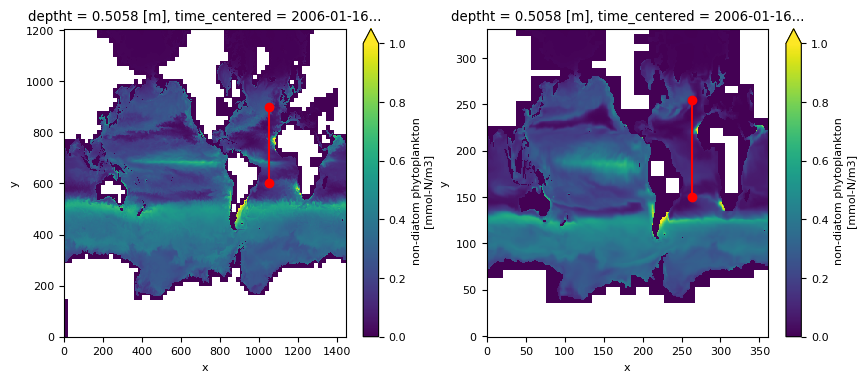

In [3]:
ds_surf= ds25.isel(deptht=0)
ds_surf= ds_surf.squeeze()
phn_surf= ds_surf.PHN

ds_surf1= ds1.isel(deptht=0)
ds_surf1= ds_surf1.squeeze()
phn_surf1= ds_surf1.PHN


fig, axs = plt.subplots(1, 2, figsize=(10,4))
phn_surf.plot(ax=axs[0], vmin=0, vmax=1.0)
x0, y0 = 1050, 600 # These are in _pixel_ coordinates!!
x1, y1 = 1050, 900
num = 100
x025d, y025d = np.linspace(x0, x1, num), np.linspace(y0, y1, num)

axs[0].plot([x0, x1], [y0, y1], 'ro-')

phn_surf1.plot(ax=axs[1], vmin=0, vmax=1.0)
x0, y0 = 263,150 # These are in _pixel_ coordinates!!
x1, y1 = 263,255
num = 100
x1d, y1d = np.linspace(x0, x1, num), np.linspace(y0, y1, num)
axs[1].plot([x0, x1], [y0, y1], 'ro-')

Now we look at the phytoplankton biomass (concentration) along the transect. Here we use scipy.ndimage to do cubic interpolation on what is within the north-south transect. Then we plot to see the difference between the two resolutions:

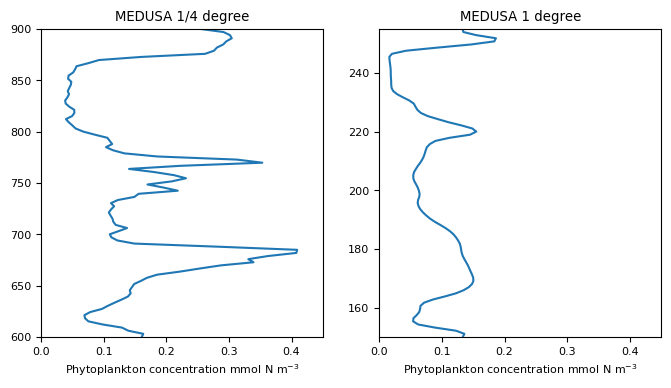

In [7]:
import scipy.ndimage
phn_surf= phn_surf.fillna(0)
pp= np.array(phn_surf)
z025 = scipy.ndimage.map_coordinates(np.transpose(pp), np.vstack((x025d,y025d)))

phn_surf1d= phn_surf1.fillna(0)
pp1d= np.array(phn_surf1d)
z1d= scipy.ndimage.map_coordinates(np.transpose(pp1d), np.vstack((x1d,y1d)))

# Now plot:
fig, axs = plt.subplots(1,2, figsize=(8,4))
axs[0].plot(z025,y025d)
axs[0].set_title('MEDUSA 1/4 degree')
axs[0].set_ylim(600, 900)

axs[1].plot(z1d,y1d)
axs[1].set_title('MEDUSA 1 degree')
axs[1].set_ylim(150,255)

for ax in axs:
    ax.set_xlabel('Phytoplankton concentration mmol N m$^{-3}$')
    ax.set_xlim(0, 0.45)